In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**GIVEN THE NUMBER OF HOURS A STUDENT STUDIES , WE HAVE TO CALCULATE THE SCORE ACCORDINGLY**


1.   DEFINETELY THERE IS A RELATION SHIP BETWEEN SCORE AND HOURS
2.   FIND WHAT KIND OF RELATION




In [ ]:
df=pd.read_csv("/content/student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.shape

(25, 2)

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


OUTLIER DETECTION:

BY BOX PLOT WITH IQR VALUE

IQR=Q3-Q1

HERE

IQR=7.4-2.7=4.7

OUTLIER THE VALUE GREATER THAN Q3+1.5IQR AND LESS THAN  Q1-1.5IQR

7.4+(1.5*4.7)=14.45

2.5-(1.5*4.7)=-4.55

NO OUTLIER IN HOURS COLUMN NO VALUE GREATER THAN 14.45 AND LESS THAN -5

SIMILLARLLY NO OUTLIER IN  SCORE COLUMN



In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
#CHECK FOR DUPLICATES AND DROP
df=df.drop_duplicates()

IT TO DROP FOR A PARTICULAR COLUMN WE CAN MENTION THE COLUMN NAME IN THE SYNTAX

df=df.drop_duplicates(COLUMNS="COLUMN_NAME")

In [ ]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

**EDA**
linearity check

1.plotting

2.correlation

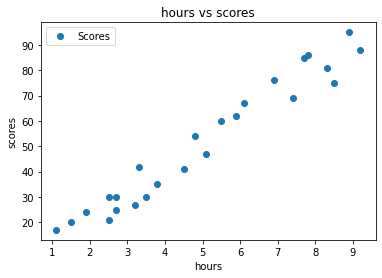

In [ ]:
df.plot(x='Hours',y='Scores',style='o')
plt.title("hours vs scores")
plt.xlabel("hours")
plt.ylabel("scores")
plt.show()

In [ ]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


GOOD LINEAR RELATIONSHIP

NO TRANSFORMATION

ANY DATA

GO COLUMN BY COLUMN

FEATURE VS TARGET PLOT

1.REALTIONSHIP?

2.LINEAR?

3.ANY TRANFORMATION?


In [ ]:
x=df.loc[:,['Hours']].values #converting the dataframe into numpy array, all the rows and all the column expect target
y=df.loc[:,'Scores'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7) # test size 20% and 80% to train,randomly split,the result is need not be the same

computation are arrays are faster so we are converting it into an array using numpy

In [ ]:
y_test

array([47, 20, 62, 42, 27, 54, 25, 30])

In [ ]:
x_train.shape,y_train.shape

((17, 1), (17,))

MODELLING

In [ ]:
#Model for algorithm - score = (m * hours) + c
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train) #loss,gd,learning,m c chosen,jars done

LinearRegression()

In [ ]:
print(regressor.intercept_) # c

1.7208083832335603


In [ ]:
print(regressor.coef_) # slope - m

[9.87275449]


In [ ]:
#predict_score= 9.89(score)+1.72
regressor.predict([[5]])

array([51.08458084])

test data we can evaluate the model


In [ ]:
y_pred=regressor.predict(x_test)
y_pred

array([52.07185629, 16.52994012, 59.97005988, 34.3008982 , 33.31362275,
       49.11002994, 28.37724551, 26.40269461])

In [ ]:
df=pd.DataFrame({"actual":y_test,"predicted":y_pred})
df

,actual,predicted
0,47,52.071856
1,20,16.529940
2,62,59.970060
3,42,34.300898
4,27,33.313623
5,54,49.110030
6,25,28.377246
7,30,26.402695


In [ ]:
from sklearn import metrics
print("R2_score: ",metrics.r2_score(y_test,y_pred))

R2_score:  0.8821316105563578


In [ ]:
regressor.predict([[13]])

array([130.06661677])

perils of extrapolation

prediction should be from the range it should not exceed

13 is not in the dataset